LINK DATASET : https://drive.google.com/file/d/1bIKO1UumMhq1Yyy90NAkH1pHJ0wrIY-q/view?usp=sharing

# DATA DIRI

NAMA          : ENDOW BONAPEN

EMAIL         : 2010511010@mahasiswa.upnvj.ac.id

USERNAME      : endowb


# IMPORT MODUL

In [34]:
!pip install Sastrawi
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import emoji
import matplotlib.pyplot as plt

import datetime as dt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.models import Sequential

In [37]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

# DATA EXPLORATION

In [38]:
#Ambil dataset dari link diatas
from google.colab import drive
drive.mount('/content/drive')
link_data = "../content/drive/My Drive/DATASET_FOR_BPML/subjects-questions.csv"
data = pd.read_csv(link_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics
...,...,...
122514,Which of the following group of\ncharacters is...,Biology
122515,Light year is the\nA. light emitted by the sun...,Physics
122516,Member of Dipnoi are native of\nA. India.\nB. ...,Biology
122517,"In one average-life,\nA. half the active nucle...",Physics


In [40]:
data.dtypes

eng        object
Subject    object
dtype: object

In [41]:
data.isnull().sum()

eng        0
Subject    0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122519 entries, 0 to 122518
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   eng      122519 non-null  object
 1   Subject  122519 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [43]:
data['Subject'].value_counts()

Physics      38438
Chemistry    37767
Maths        33190
Biology      13124
Name: Subject, dtype: int64

# DATA PREPROCESSING

In [44]:
# Ambil 700 data pada setiap kelas
che = data[data['Subject'] == "Chemistry"]
phy = data[data['Subject'] == "Physics"]
mtk = data[data['Subject'] == "Maths"]
bio = data[data['Subject'] == "Biology"]

che = che.iloc[:1250, :]
phy = phy.iloc[:1250, :]
mtk = mtk.iloc[:1250, :]
bio = bio.iloc[:1250, :]

In [45]:
che = che.append(phy, ignore_index = True)
che = che.append(mtk, ignore_index = True)
che = che.append(bio, ignore_index = True)

data_new = che.copy()
data_new['Subject'].value_counts()

Chemistry    1250
Physics      1250
Maths        1250
Biology      1250
Name: Subject, dtype: int64

In [46]:
subject = pd.get_dummies(data_new.Subject)
df_quest = pd.concat([data_new, subject], axis = 1)
df_quest = df_quest.drop(columns = 'Subject')
df_quest.head()

,eng,Biology,Chemistry,Maths,Physics
0,"Among the following organic acids, the acid pr...",0,1,0,0
1,A ketone has molar mass \( 86 . \) Which of\nt...,0,1,0,0
2,An ideal gas is compressed in a closed contain...,0,1,0,0
3,What are monosaccharides? Explain denaturation...,0,1,0,0
4,The product \( B \) can be:\n\( \mathbf{A} \)\...,0,1,0,0


# TEXT CLEANING

In [47]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text)  
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
df_quest['eng'] = df_quest['eng'].apply(clean_text)

In [48]:
df_quest['eng']

0       among following organic acids acid present ran...
1       ketone molar mass 86 ofthe following cannot iu...
2       ideal gas compressed closed container ua incre...
3            monosaccharides eplain denaturation proteins
4       product b mathbf b h c h mathbf c cdot c h_ 3 ...
                              ...                        
4995    enzyme peptidyl transferase prokaryotes reside...
4996    concentration carbon dioidebeyond fails accele...
4997    callose carbohydrates traced ina vesselsb trac...
4998                     eplain electron transport system
4999    anaerobic respiration also calledasa fermentat...
Name: eng, Length: 5000, dtype: object

# TOKENIZING

In [49]:
"""MAX_NB_WORDS = 50000

MAX_SEQUENCE_LENGTH = 250

EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_quest['eng'].values)
word_index = tokenizer.word_index
print('Ditemukan %s Token yang unique.' % len(word_index))"""

'MAX_NB_WORDS = 50000\n\nMAX_SEQUENCE_LENGTH = 250\n\nEMBEDDING_DIM = 100\n\ntokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters=\'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\', lower=True)\ntokenizer.fit_on_texts(df_quest[\'eng\'].values)\nword_index = tokenizer.word_index\nprint(\'Ditemukan %s Token yang unique.\' % len(word_index))'

In [50]:
MAX_NB_WORDS = 50000

MAX_SEQUENCE_LENGTH = 250

EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, oov_token='x')
tokenizer.fit_on_texts(df_quest['eng'].values)
word_index = tokenizer.word_index
print('Ditemukan %s Token yang unique.' % len(word_index))

Ditemukan 18503 Token yang unique.


# SPLITTING DATA

In [51]:
X = tokenizer.texts_to_sequences(df_quest['eng'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

Y = df_quest.iloc[:, 1:].values

print('Shape of data tensor  : ', X.shape)
print('Shape of label tensor : ', Y.shape)

Shape of data tensor  :  (5000, 250)
Shape of label tensor :  (5000, 4)


In [52]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(4000, 250) (4000, 4)
(1000, 250) (1000, 4)


# Modelling

In [61]:
from tensorflow.keras import metrics
METRICS = [
    metrics.CategoricalAccuracy(name='categorical_accuracy'),
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc'),
    metrics.AUC(name='prc', curve='PR')
]

model = tf.keras.Sequential([
                    Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
                    SpatialDropout1D(0.5),
                    LSTM(105, dropout=0.2, recurrent_dropout=0.2),
                    Dense(4, activation='softmax')])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=METRICS)

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 105)               86520     
                                                                 
 dense_4 (Dense)             (None, 4)                 424       
                                                                 
Total params: 5,086,944
Trainable params: 5,086,944
Non-trainable params: 0
_________________________________________________________________


In [63]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [64]:
hist = model.fit(
    X_train,
    Y_train, 
    validation_data=[X_val, Y_val], 
    batch_size = 8,
    epochs=5,
    callbacks = [tensorboard_callback])

Epoch 1/5
500/500 [==============================] - 214s 421ms/step - loss: 1.0417 - categorical_accuracy: 0.5683 - precision: 0.7317 - recall: 0.3307 - auc: 0.8121 - prc: 0.6200 - val_loss: 0.7899 - val_categorical_accuracy: 0.7280 - val_precision: 0.8175 - val_recall: 0.5780 - val_auc: 0.8971 - val_prc: 0.7721
Epoch 2/5
500/500 [==============================] - 207s 415ms/step - loss: 0.4737 - categorical_accuracy: 0.8480 - precision: 0.8838 - recall: 0.8002 - auc: 0.9587 - prc: 0.9021 - val_loss: 0.5500 - val_categorical_accuracy: 0.8120 - val_precision: 0.8492 - val_recall: 0.7770 - val_auc: 0.9460 - val_prc: 0.8757
Epoch 3/5
500/500 [==============================] - 208s 416ms/step - loss: 0.2637 - categorical_accuracy: 0.9222 - precision: 0.9375 - recall: 0.9038 - auc: 0.9851 - prc: 0.9648 - val_loss: 0.4880 - val_categorical_accuracy: 0.8520 - val_precision: 0.8692 - val_recall: 0.8310 - val_auc: 0.9592 - val_prc: 0.9049
Epoch 4/5
500/500 [==============================] - 20

In [65]:
model.evaluate(X_val, Y_val)

32/32 [==============================] - 3s 77ms/step - loss: 0.5093 - categorical_accuracy: 0.8610 - precision: 0.8745 - recall: 0.8500 - auc: 0.9561 - prc: 0.8985


[0.5092924237251282,
 0.8610000014305115,
 0.8744856119155884,
 0.8500000238418579,
 0.9561472535133362,
 0.8985116481781006]

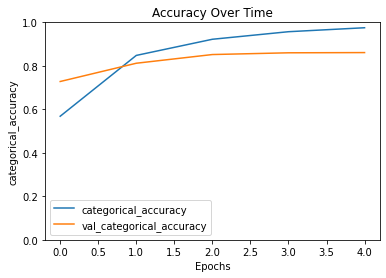

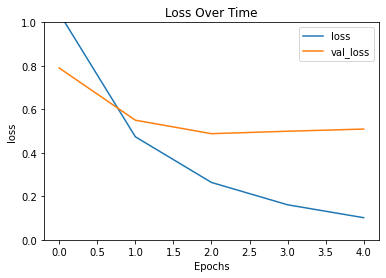

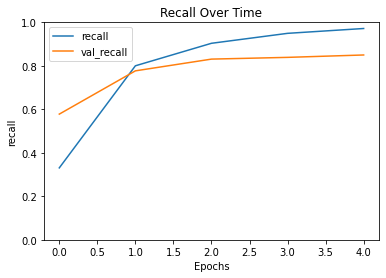

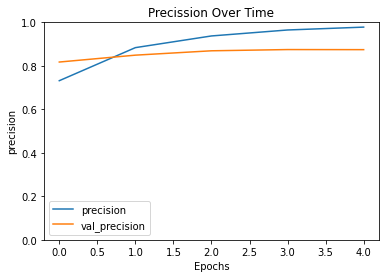

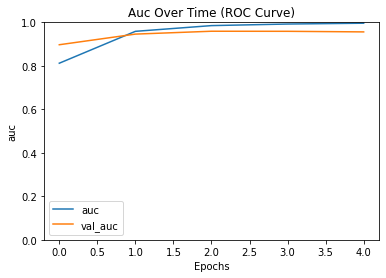

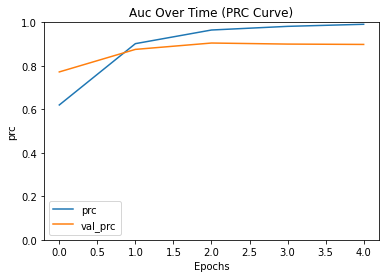

In [66]:
analisis_train = ['categorical_accuracy', 'loss', 'recall', 'precision', 'auc', 'prc']
analisis_val = ['val_categorical_accuracy', 'val_loss', 'val_recall','val_precision', 'val_auc', 'val_prc' ]
notes = ['Accuracy Over Time', 'Loss Over Time', 'Recall Over Time', 'Precission Over Time', 'Auc Over Time (ROC Curve)', 'Auc Over Time (PRC Curve)']

for analize in range(0, len(analisis_train)):
  plt.plot(hist.history[analisis_train[analize]], label=analisis_train[analize])
  plt.plot(hist.history[analisis_val[analize]], label = analisis_val[analize])
  plt.xlabel('Epochs')
  plt.ylabel(analisis_train[analize])
  plt.ylim(0, 1)
  plt.title(notes[analize])
  plt.legend()
  plt.show()